 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch 1, Training Loss: 0.2956441936181089, Training Accuracy: 91.63518518518518, Validation Loss: 0.24437061035863583, Validation Accuracy: 93.41666666666667
Epoch 2, Training Loss: 0.22925381540390286, Training Accuracy: 93.54074074074073, Validation Loss: 0.19326806279809414, Validation Accuracy: 94.98333333333333
Epoch 3, Training Loss: 0.1959666517295375, Training Accuracy: 94.42592592592592, Validation Loss: 0.16549554158076915, Validation Accuracy: 95.51666666666667
Epoch 4, Training Loss: 0.1606852115601069, Training Accuracy: 95.45, Validation Loss: 0.14041121172252538, Validation Accuracy: 96.35000000000001
Epoch 5, Training Loss: 0.14122280922389868, Training Accuracy: 96.00740740740741, Validation Loss: 0.12862171830313537, Validation Accuracy: 96.3
Epoch 6, Training Loss: 0.12390679767108982, Training Accuracy: 96.53148148148148, Validation Loss: 0.11797922900408901,

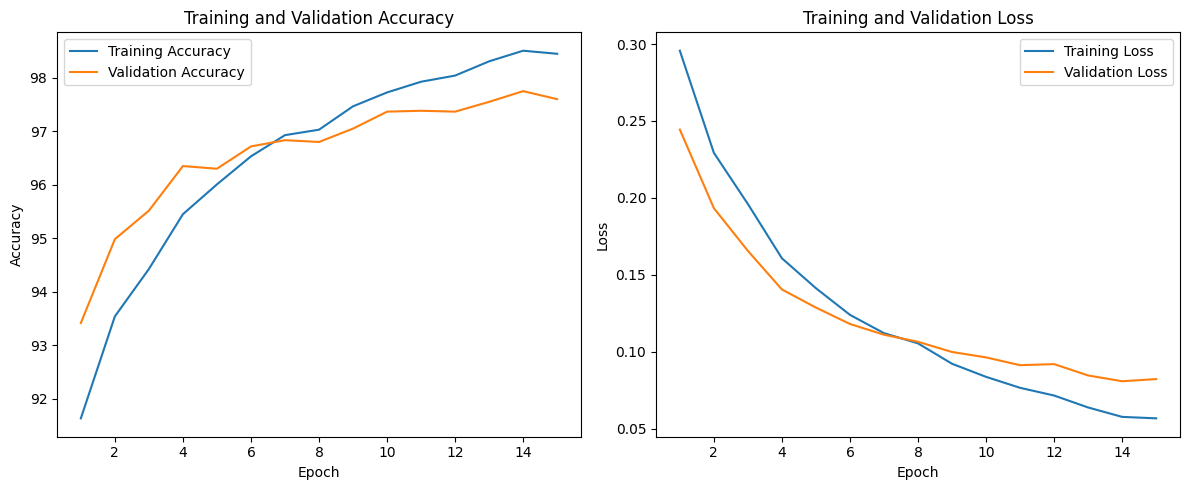

Test Loss: 2.2602677724802414, Test Accuracy: 97.50999999999999


In [ ]:
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

trainData = mnist_trainset.data.numpy().reshape(-1, 784) / 255.0
trainLabel = mnist_trainset.targets.numpy()
testData = mnist_testset.data.numpy().reshape(-1, 784) / 255.0
testLabel = mnist_testset.targets.numpy()

# Splitting training data into training and validation sets
split_size = int(trainData.shape[0] * 0.9)
valData = trainData[split_size:]
valLabel = trainLabel[split_size:]
trainData = trainData[:split_size]
trainLabel = trainLabel[:split_size]

##################################################
#Define the architecture
##################################################

# Complete the below function to implement ReLU activation function
def ReLu(inp):
    return np.maximum(0, inp)

# Complete the below function to implement gradient of ReLU activation function
def gradReLu(inp):
    inp = np.array(inp)
    return np.where(inp > 0, 1, 0)

#Complete the below function to impliment softmax activation function
def softmax(inp):
    exp_shifted = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exp_shifted / np.sum(exp_shifted, axis=1, keepdims=True)

#Complete the below function to implement forward propagation of data
def fwdPropagate(inputs, weights):
    # Inputs: input data, parameters of network
    W1, W2, W3 = weights

    # Forward pass
    Z1 = inputs.dot(W1)
    A1 = ReLu(Z1)
    Z2 = A1.dot(W2)
    A2 = ReLu(Z2)
    Z3 = A2.dot(W3)
    Y = softmax(Z3)

    # Return the required outputs, i.e., final output and intermediate activations
    return (Y, Z1, A1, Z2, A2, Z3)

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    Y, Z1, A1, Z2, A2, Z3 = activations
    targetLen = targets.shape[0]

    # Gradient on third layer weights
    dZ3 = Y.copy()
    dZ3[range(targetLen), targets] -= 1
    dZ3 /= targetLen
    dW3 = A2.T.dot(dZ3)

    dA2 = dZ3.dot(W3.T)
    dZ2 = dA2 * gradReLu(Z2)
    dW2 = A1.T.dot(dZ2)

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * gradReLu(Z1)
    dW1 = inputs.T.dot(dZ1)

    # Return the gradients
    return [dW1, dW2, dW3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients
    temp1 = W1 - learning_rate * dj_dw1
    temp2 = W2 - learning_rate * dj_dw2
    temp3 = W3 - learning_rate * dj_dw3
    W1 = temp1
    W2 = temp2
    W3 = temp3

  #Return the updated parameters
    return [W1, W2, W3]


#Complete the below function to complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
    gradients = computeGradients(inputs, targets, weights, activations)
  #Update the paramters using gradients
    weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
    return weights

def crossEntropyLoss(output, target):
    targetLen = target.shape[0]
    log_likelihood = -np.log(output[range(targetLen), target])
    loss = np.sum(log_likelihood) / targetLen
    return loss


def accuracy(output, target):
    count = 0
    predictions = np.argmax(output, axis=1)
    for i in range(len(predictions)):
        if predictions[i] == target[i]:
            count+=1
    return (count/len(predictions))*100

##################################################
#Train the network
##################################################


#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size=128, epochs=15, train_val_split=0.9, learning_rate=0.001):

    # Set the hyperparameters
    hidden_units= 3
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Split the training data into two parts.
    # Use 90 percent of training data for training the network.
    # Remaining 10 percent as validation data
    split_size = int(n_samples * train_val_split)
    trainData = inputs[:split_size]
    trainLabel = targets_idx[:split_size]
    valData = inputs[split_size:]
    valLabel = targets_idx[split_size:]

    # Randomly initialize the weights
    inputDimension = trainData.shape[1]
    W1 = np.random.randn(inputDimension, 512) * 0.01
    W2 = np.random.randn(512, 512) * 0.01
    W3 = np.random.randn(512, n_classes) * 0.01
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        idx = np.random.permutation(split_size)
        trainData = trainData[idx]
        trainLabel = trainLabel[idx]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            startIndex = batch * batch_size
            endIndex = (batch + 1) * batch_size
            batchData = trainData[startIndex:endIndex]
            batchLabel = trainLabel[startIndex:endIndex]

            # Forward propagation
            activations = fwdPropagate(batchData, weights)

            # Backward propagation
            weights = backPropagate(batchData, batchLabel, weights, activations, learning_rate)

        # Compute outputs on training data
        activations = fwdPropagate(trainData, weights)
        trainPred = activations[0]

        # Compute training accuracy, and training error
        trainLoss = crossEntropyLoss(trainPred, trainLabel)
        trainAccuracy = accuracy(trainPred, trainLabel)

        # Compute outputs on validation data
        activations = fwdPropagate(valData, weights)
        valPred = activations[0]

        # Compute validation accuracy, and validation error
        valLoss = crossEntropyLoss(valPred, valLabel)
        valAccuracy = accuracy(valPred, valLabel)

        # Print the statistics of training
        print(f'Epoch {epoch + 1}, Training Loss: {trainLoss}, Training Accuracy: {trainAccuracy}, Validation Loss: {valLoss}, Validation Accuracy: {valAccuracy}')

        train_losses.append(trainLoss)
        train_accuracies.append(trainAccuracy)
        val_losses.append(valLoss)
        val_accuracies.append(valAccuracy)

     # Plot the results
    plt.figure(figsize=(12, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


    # Save the parameters of network
    return weights

# Call the training function to train the network
mnist_traindata = mnist_traindata.reshape(len(mnist_traindata), -1)
trained_weights = training(mnist_traindata, mnist_trainlabel)



##################################################
#Evaluate the performance on test data
##################################################
activations = fwdPropagate(testData, trained_weights)
testLoss = crossEntropyLoss(activations[0], testLabel)
testAccuracy = accuracy(activations[0], testLabel)
print(f'Test Loss: {testLoss}, Test Accuracy: {testAccuracy}')


<b> Report your observations </b>

1. As the number of epochs increases, the training accuracy and validation accuracy increase. This is because the network is learning from the training data, optimizing its weights to better classify the input data based on the feedback from the loss function.

2. I took till 15 epochs but After a certain point, validation accuracy might plateau or even start decreasing, which can be a sign of overfitting. Overfitting occurs when the model learns patterns specific to the training data, but not generalizable to unseen data, causing performance on the validation set to worsen.

3. Both training and validation loss decrease as number of epochs increase but it might happen that validation loss might start increasing after a certain point because of overfitting.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



Training with Sigmoid activation function:
Epoch 1, Training Loss: 2.3834194502878683, Training Accuracy: 9.627314814814815, Validation Loss: 2.378794554100981, Validation Accuracy: 10.13888888888889
Epoch 2, Training Loss: 2.315339435382329, Training Accuracy: 11.425925925925926, Validation Loss: 2.319901745935849, Validation Accuracy: 10.888888888888888
Epoch 3, Training Loss: 2.307208039734914, Training Accuracy: 20.875, Validation Loss: 2.3106049501826122, Validation Accuracy: 19.824074074074076
Epoch 4, Training Loss: 2.210006947467873, Training Accuracy: 27.733796296296298, Validation Loss: 2.209238791785368, Validation Accuracy: 27.12962962962963
Epoch 5, Training Loss: 1.6877241719432088, Training Accuracy: 38.17824074074074, Validation Loss: 1.6907869956767265, Validation Accuracy: 38.25
Epoch 6, Training Loss: 1.2049325510326747, Training Accuracy: 55.375, Validation Loss: 1.206038084757664, Validation Accuracy: 55.55555555555556
Epoch 7, Training Loss: 0.8752782020475405, Tr

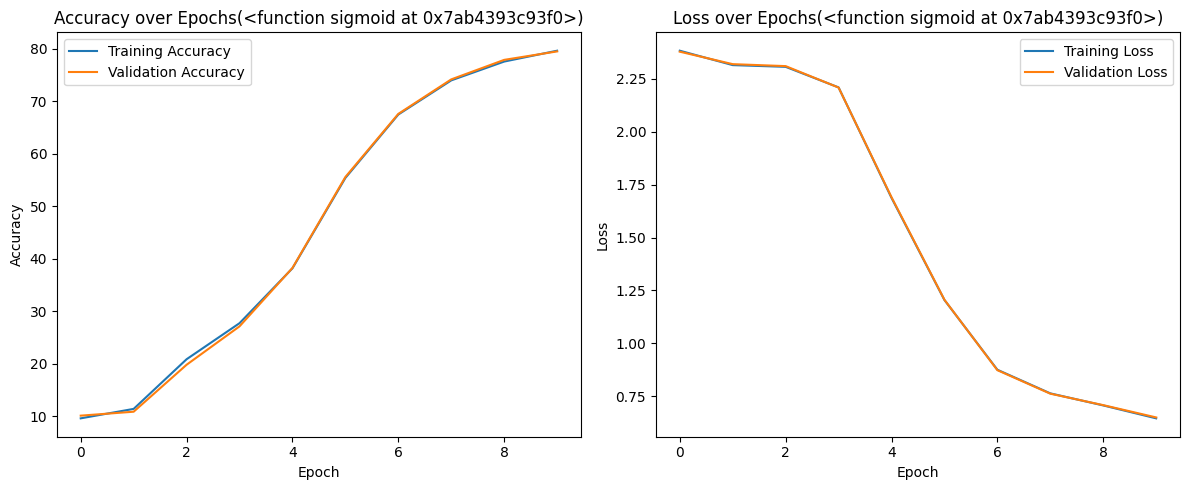

Test Loss: 0.633063655329606, Test Accuracy: 80.46
Training with Tanh activation function:
Epoch 1, Training Loss: 0.44084398221448323, Training Accuracy: 87.26157407407408, Validation Loss: 0.4587237104073667, Validation Accuracy: 86.18518518518519
Epoch 2, Training Loss: 0.34961386919850623, Training Accuracy: 89.98842592592592, Validation Loss: 0.374514580736459, Validation Accuracy: 89.08333333333334
Epoch 3, Training Loss: 0.30401504948634117, Training Accuracy: 91.39583333333333, Validation Loss: 0.3335202471701007, Validation Accuracy: 90.38888888888889
Epoch 4, Training Loss: 0.2937169742601114, Training Accuracy: 91.47222222222223, Validation Loss: 0.3306884078774198, Validation Accuracy: 90.5
Epoch 5, Training Loss: 0.25530954442209053, Training Accuracy: 92.69212962962963, Validation Loss: 0.2915710391686345, Validation Accuracy: 91.75
Epoch 6, Training Loss: 0.23662955867867394, Training Accuracy: 93.14814814814815, Validation Loss: 0.27810447737640764, Validation Accuracy:

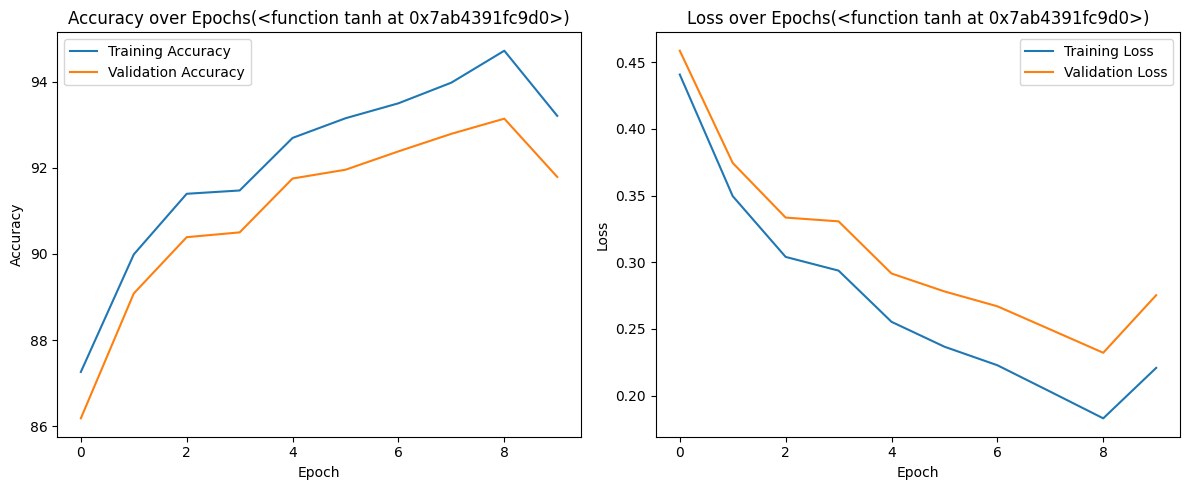

Test Loss: 0.2433234363066481, Test Accuracy: 92.56
Training with ReLU activation function:
Epoch 1, Training Loss: 0.5008340082658314, Training Accuracy: 85.20138888888889, Validation Loss: 0.507788052050278, Validation Accuracy: 84.62037037037037
Epoch 2, Training Loss: 0.34256054856791734, Training Accuracy: 90.10416666666666, Validation Loss: 0.3592446120603058, Validation Accuracy: 89.26851851851852
Epoch 3, Training Loss: 0.2757731195046488, Training Accuracy: 91.75694444444444, Validation Loss: 0.29645400051074444, Validation Accuracy: 91.08333333333334
Epoch 4, Training Loss: 0.207307512147338, Training Accuracy: 94.03703703703704, Validation Loss: 0.23980123125095462, Validation Accuracy: 93.10185185185185
Epoch 5, Training Loss: 0.15920499449163872, Training Accuracy: 95.47453703703704, Validation Loss: 0.19372155158661047, Validation Accuracy: 94.54629629629629
Epoch 6, Training Loss: 0.14960785064761295, Training Accuracy: 95.69675925925925, Validation Loss: 0.1934456534057

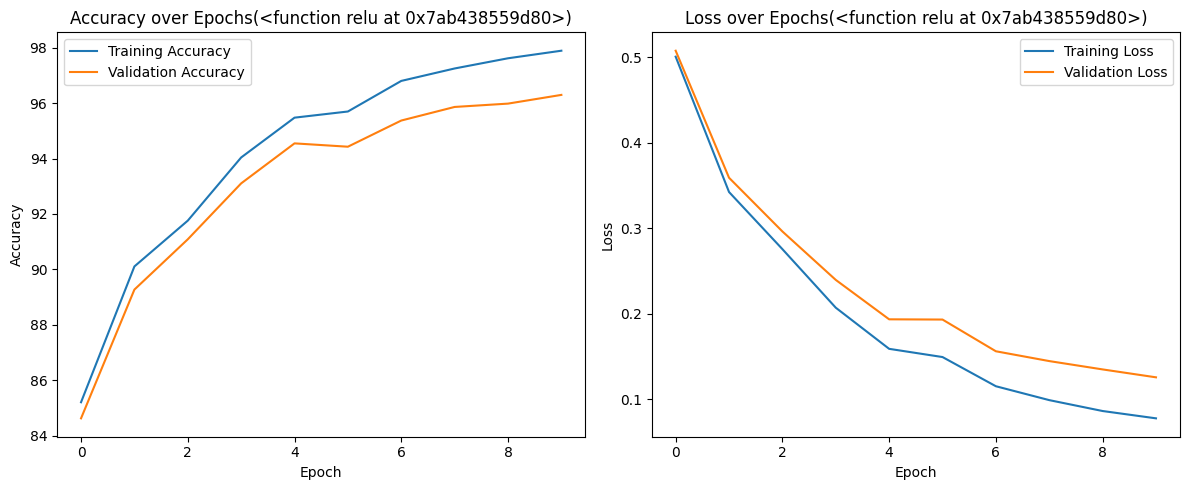

Test Loss: 0.10438633331036233, Test Accuracy: 96.89
Training with LeakyReLU activation function:
Epoch 1, Training Loss: 0.5242230371269817, Training Accuracy: 84.51851851851852, Validation Loss: 0.5338323765980203, Validation Accuracy: 83.46296296296296
Epoch 2, Training Loss: 0.347077984284548, Training Accuracy: 90.15046296296296, Validation Loss: 0.36029841992829004, Validation Accuracy: 89.74074074074075
Epoch 3, Training Loss: 0.31010897376767904, Training Accuracy: 90.6087962962963, Validation Loss: 0.33962431813073524, Validation Accuracy: 89.64814814814814
Epoch 4, Training Loss: 0.2257405219855686, Training Accuracy: 93.25925925925927, Validation Loss: 0.2584307034156901, Validation Accuracy: 92.28703703703704
Epoch 5, Training Loss: 0.17392655620622083, Training Accuracy: 94.91435185185185, Validation Loss: 0.2097881037061188, Validation Accuracy: 93.98148148148148
Epoch 6, Training Loss: 0.15331887099240393, Training Accuracy: 95.44907407407408, Validation Loss: 0.19496049

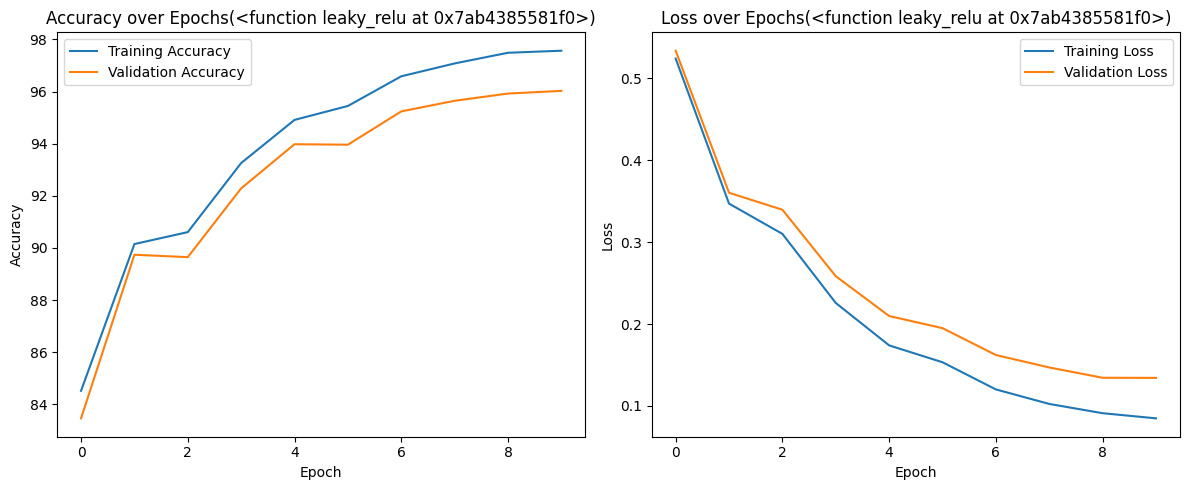

Test Loss: 0.10988912970870951, Test Accuracy: 96.53


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha*x, x)

def sigmoidGradient(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def tanhGradient(x):
    return 1 - np.tanh(x)**2

def relu_gradient(x):
    return (x > 0).astype(float)

def leaky_relu_gradient(x, alpha=0.01):
    return (x > 0).astype(float) + alpha * (x <= 0).astype(float)

def forwardPropagation(X, weights, activationFunction):
    W1, W2, W3 = weights

    Z1 = X.dot(W1)
    A1 = activationFunction(Z1)
    Z2 = A1.dot(W2)
    A2 = activationFunction(Z2)
    Z3 = A2.dot(W3)
    Y = softmax(Z3)
    return (Y, Z1, A1, Z2, A2, Z3)

def backwardPropagation(X, Y, weights, activations, activationGradient):
    W1, W2, W3 = weights
    preds, Z1, A1, Z2, A2, Z3 = activations
    trainLen = Y.shape[0]

    dZ3 = preds.copy()
    dZ3[range(trainLen), Y] -= 1
    dZ3 /= trainLen
    dW3 = A2.T.dot(dZ3)

    dA2 = dZ3.dot(W3.T)
    dZ2 = dA2 * activationGradient(Z2)
    dW2 = A1.T.dot(dZ2)

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * activationGradient(Z1)
    dW1 = X.T.dot(dZ1)

    return [dW1, dW2, dW3]

def train(inputs, targets_idx, activationFunction, activationGradient,batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hiddenUnits = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    split_size = int(n_samples * train_val_split)
    trainData = inputs[:split_size]
    trainLabel = targets_idx[:split_size]
    valData = inputs[split_size:]
    valLabel = targets_idx[split_size:]

    inputDimension = trainData.shape[1]
    W1 = np.random.randn(inputDimension, hiddenUnits) * 0.01
    W2 = np.random.randn(hiddenUnits, hiddenUnits) * 0.01
    W3 = np.random.randn(hiddenUnits, n_classes) * 0.01
    weights = [W1, W2, W3]

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        idx = np.random.permutation(split_size)
        trainData = trainData[idx]
        trainLabel = trainLabel[idx]

        for i in range(0, trainData.shape[0], batch_size):
            batchData = trainData[i:i+batch_size]
            batchLabel = trainLabel[i:i+batch_size]

            activations = forwardPropagation(batchData, weights, activationFunction)

            gradients = backwardPropagation(batchData, batchLabel, weights, activations, activationGradient)

            weights = applyGradients (weights, gradients, learning_rate)

        activations = forwardPropagation(trainData, weights, activationFunction)

        trainLoss = crossEntropyLoss(activations[0], trainLabel)
        trainAccuracy = accuracy(activations[0], trainLabel)

        activations = forwardPropagation(valData, weights, activationFunction)
        valLoss = crossEntropyLoss(activations[0], valLabel)
        valAccuracy = accuracy(activations[0], valLabel)

        train_losses.append(trainLoss)
        train_accuracies.append(trainAccuracy)
        val_losses.append(valLoss)
        val_accuracies.append(valAccuracy)

        print(f'Epoch {epoch + 1}, Training Loss: {trainLoss}, Training Accuracy: {trainAccuracy}, Validation Loss: {valLoss}, Validation Accuracy: {valAccuracy}')

            # Plotting
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title(f'Accuracy over Epochs({activationFunction})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'Loss over Epochs({activationFunction})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return weights

activation_functions = {
    "Sigmoid": (sigmoid, sigmoidGradient),
    "Tanh": (tanh, tanhGradient),
    "ReLU": (relu, relu_gradient),
    "LeakyReLU": (leaky_relu, leaky_relu_gradient)
}

for name, (activationFunction, activationGradient) in activation_functions.items():
    print(f"Training with {name} activation function:")
    weights = train(trainData, trainLabel, batch_size=128, epochs=10, learning_rate=0.1, activationFunction=activationFunction, activationGradient=activationGradient)

    # Testing the model
    activations = forwardPropagation(testData, weights, activationFunction)
    testLoss = crossEntropyLoss(activations[0], testLabel)
    testAccuracy = accuracy(activations[0], testLabel)
    print(f'Test Loss: {testLoss}, Test Accuracy: {testAccuracy}')



<b> Report your observations </b>

1. sigmoid and tanh activation functions are not a good choice for activation function as it suffers from the problem of vanishing gradients as its gradient value lies between 0 and 1

2. relu and leaky relu are good choices for activation function as gradients are equal to 1 for positive x and hence vanishing gradient is not a problem anymore.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

Training with Adam optimizer:
Epoch 1, Training Loss: 0.104051466917088, Training Accuracy: 96.75925925925925, Validation Loss: 0.1540118220747436, Validation Accuracy: 95.37037037037037
Epoch 2, Training Loss: 0.0651766108181692, Training Accuracy: 97.9375, Validation Loss: 0.1294588303951522, Validation Accuracy: 96.24074074074073
Epoch 3, Training Loss: 0.040630939238892314, Training Accuracy: 98.7199074074074, Validation Loss: 0.11642662318604186, Validation Accuracy: 96.6574074074074
Epoch 4, Training Loss: 0.029506613373365315, Training Accuracy: 99.05092592592592, Validation Loss: 0.11212640840374181, Validation Accuracy: 96.76851851851852
Epoch 5, Training Loss: 0.03521483183346524, Training Accuracy: 98.83564814814815, Validation Loss: 0.14563541731765992, Validation Accuracy: 96.32407407407408
Epoch 6, Training Loss: 0.01338226040311879, Training Accuracy: 99.61574074074075, Validation Loss: 0.1273173722005108, Validation Accuracy: 97.11111111111111
Epoch 7, Training Loss: 0.

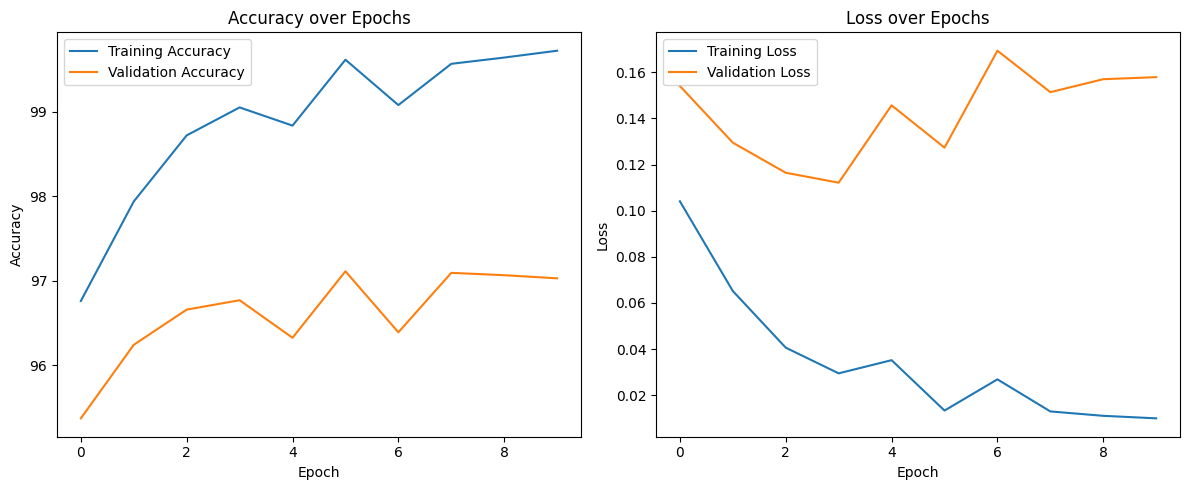

Training with SGD optimizer:
Epoch 1, Training Loss: 2.2879314412548943, Training Accuracy: 57.333333333333336, Validation Loss: 2.287978790247507, Validation Accuracy: 58.34259259259259
Epoch 2, Training Loss: 2.0659138354769517, Training Accuracy: 60.738425925925924, Validation Loss: 2.0676168192964837, Validation Accuracy: 60.611111111111114
Epoch 3, Training Loss: 0.8913976840145909, Training Accuracy: 73.51388888888889, Validation Loss: 0.8885947509859495, Validation Accuracy: 74.17592592592592
Epoch 4, Training Loss: 0.6171942301344204, Training Accuracy: 81.65046296296296, Validation Loss: 0.6187176836792301, Validation Accuracy: 81.2962962962963
Epoch 5, Training Loss: 0.4907935994674983, Training Accuracy: 85.88194444444444, Validation Loss: 0.4989308878339104, Validation Accuracy: 85.11111111111111
Epoch 6, Training Loss: 0.42937685330776343, Training Accuracy: 87.74768518518519, Validation Loss: 0.44095447732107945, Validation Accuracy: 86.82407407407408
Epoch 7, Training Lo

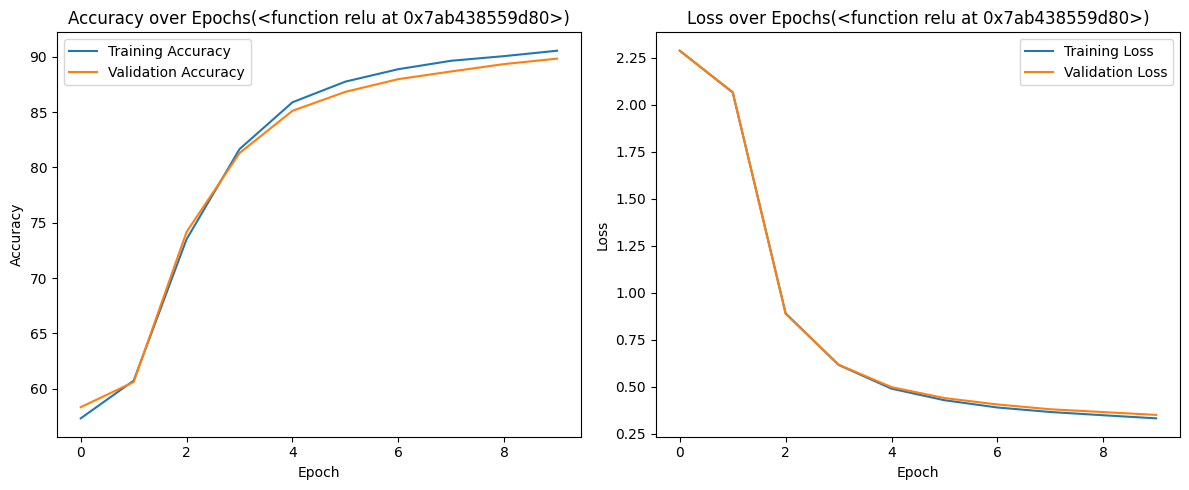

Adam Test Loss: 0.13135686763827595, Adam Test Accuracy: 97.37
SGD Test Loss: 0.3223028315559897, SGD Test Accuracy: 90.64


In [ ]:
def AdamOptimizationAlgorithm(inputs, targets_idx, activationFunction, activationGradient,batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hiddenUnits = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    splitSize = int(n_samples * train_val_split)
    trainData = inputs[:splitSize]
    trainLabel = targets_idx[:splitSize]
    valData = inputs[splitSize:]
    valLabel = targets_idx[splitSize:]

    inputDimension = trainData.shape[1]
    W1 = np.random.randn(inputDimension, hiddenUnits) * 0.01
    W2 = np.random.randn(hiddenUnits, hiddenUnits) * 0.01
    W3 = np.random.randn(hiddenUnits, n_classes) * 0.01
    weights = [W1, W2, W3]

    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m_t = [np.zeros_like(w) for w in weights]
    v_t = [np.zeros_like(w) for w in weights]

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        idx = np.random.permutation(splitSize)
        trainData = trainData[idx]
        trainLabel = trainLabel[idx]
        for i in range(0, trainData.shape[0], batch_size):
            batchData = trainData[i:i+batch_size]
            batchLabel = trainLabel[i:i+batch_size]

            activations = forwardPropagation(batchData, weights, activationFunction)
            grads = backwardPropagation(batchData, batchLabel, weights, activations, activationGradient)

            for j in range(len(weights)):
                m_t[j] = beta1 * m_t[j] + (1 - beta1) * grads[j]
                v_t[j] = beta2 * v_t[j] + (1 - beta2) * (grads[j] ** 2)
                m_t_hat = m_t[j] / (1 - beta1 ** (epoch + 1))
                v_t_hat = v_t[j] / (1 - beta2 ** (epoch + 1))
                weights[j] -= learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

        activations = forwardPropagation(trainData, weights, activationFunction)

        trainLoss = crossEntropyLoss(activations[0], trainLabel)
        trainAccuracy = accuracy(activations[0], trainLabel)

        train_losses.append(trainLoss)
        train_accuracies.append(trainAccuracy)

        activations = forwardPropagation(valData, weights, activationFunction)
        valLoss = crossEntropyLoss(activations[0], valLabel)
        valAccuracy = accuracy(activations[0], valLabel)

        val_losses.append(valLoss)
        val_accuracies.append(valAccuracy)

        print(f'Epoch {epoch + 1}, Training Loss: {trainLoss}, Training Accuracy: {trainAccuracy}, Validation Loss: {valLoss}, Validation Accuracy: {valAccuracy}')

        # Plotting the results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title(f'Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return weights

activationFunction = relu
activationGradient = relu_gradient

print("Training with Adam optimizer:")
AdamWeights = AdamOptimizationAlgorithm(trainData, trainLabel, epochs=10, batch_size=64, learning_rate=0.01, activationFunction=activationFunction, activationGradient=activationGradient)

print("Training with SGD optimizer:")
sgdWeights = train(trainData, trainLabel, epochs=10, batch_size=64, learning_rate=0.01, activationFunction=activationFunction, activationGradient=activationGradient)

activations = forwardPropagation(testData, AdamWeights, activationFunction)
adamLoss = crossEntropyLoss(activations[0], testLabel)
adamAccuracy = accuracy(activations[0], testLabel)
print(f'Adam Test Loss: {adamLoss}, Adam Test Accuracy: {adamAccuracy}')

activations = forwardPropagation(testData, sgdWeights, activationFunction)
sgdLoss = crossEntropyLoss(activations[0], testLabel)
sgdAccuracy = accuracy(activations[0], testLabel)
print(f'SGD Test Loss: {sgdLoss}, SGD Test Accuracy: {sgdAccuracy}')


<b> Report your observations </b>

1. Adam Optimization Algorithm works better than SGD.

2. This is because Adam dynamically adjusts the learning rate for each parameter, based on the average of past gradients for that parameter. This adaptive learning rate can lead to faster convergence and better performance. Adam utilizes momentum, which helps accelerate gradients in the relevant direction and dampens oscillations

3. Also Adam is less sensitive to the choice of hyperparameters compared to traditional SGD. Adam often requires fewer epochs to converge compared to SGD, meaning it can achieve good results with less computational resources and training time.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


Training with weight regularization:
Epoch 1, Training Loss: 2.3110808645826744, Training Accuracy: 39.6522633744856, Validation Loss: 2.3113691788257293, Validation Accuracy: 41.22222222222222
Epoch 2, Training Loss: 1.6962246530572034, Training Accuracy: 59.72222222222222, Validation Loss: 1.7052106060128005, Validation Accuracy: 59.22222222222222
Epoch 3, Training Loss: 0.7929940929970043, Training Accuracy: 77.57201646090535, Validation Loss: 0.8077907774152416, Validation Accuracy: 78.07407407407408
Epoch 4, Training Loss: 0.5927650488052731, Training Accuracy: 84.26131687242798, Validation Loss: 0.6160911069796337, Validation Accuracy: 83.27777777777777
Epoch 5, Training Loss: 0.5058099499009517, Training Accuracy: 87.01440329218107, Validation Loss: 0.534556331177437, Validation Accuracy: 85.38888888888889
Epoch 6, Training Loss: 0.45820796499083677, Training Accuracy: 88.55555555555556, Validation Loss: 0.4903563734097941, Validation Accuracy: 87.12962962962963
Epoch 7, Trainin

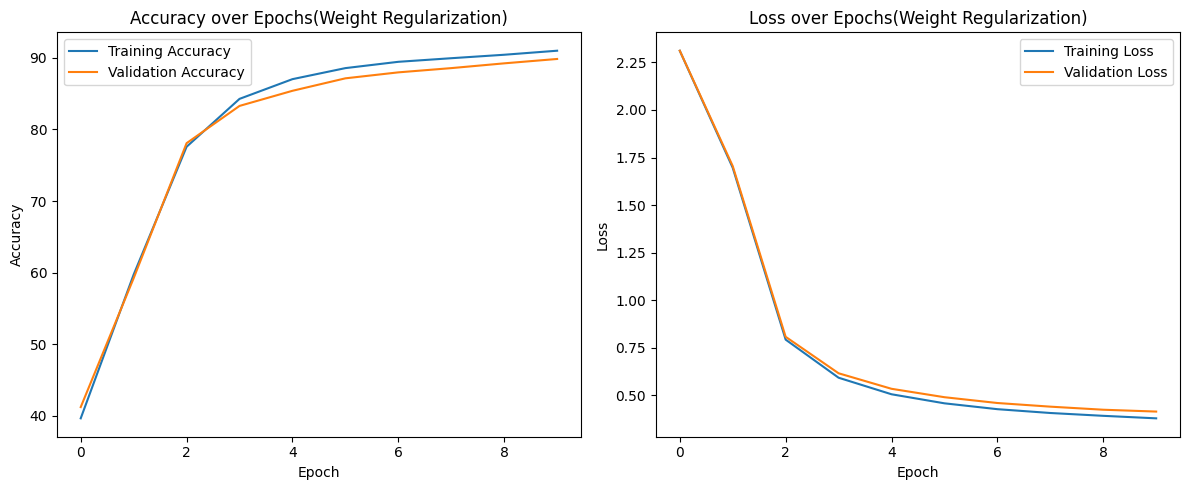

Training with dropout strategy:
Epoch 1, Training Loss: 2.2879314752794326, Training Accuracy: 24.46090534979424, Validation Loss: 2.288067002775907, Validation Accuracy: 26.25925925925926
Epoch 2, Training Loss: 2.085632884153439, Training Accuracy: 32.29835390946502, Validation Loss: 2.086713058368857, Validation Accuracy: 32.351851851851855
Epoch 3, Training Loss: 0.9762123596668838, Training Accuracy: 72.79423868312757, Validation Loss: 0.9891207580821211, Validation Accuracy: 73.62962962962963
Epoch 4, Training Loss: 0.6607432798590149, Training Accuracy: 81.06995884773663, Validation Loss: 0.6790475396287009, Validation Accuracy: 80.74074074074075
Epoch 5, Training Loss: 0.5127467520454525, Training Accuracy: 85.68930041152262, Validation Loss: 0.5367009995353076, Validation Accuracy: 84.85185185185186
Epoch 6, Training Loss: 0.43701091890293764, Training Accuracy: 87.7798353909465, Validation Loss: 0.46566342152163737, Validation Accuracy: 86.85185185185185
Epoch 7, Training Los

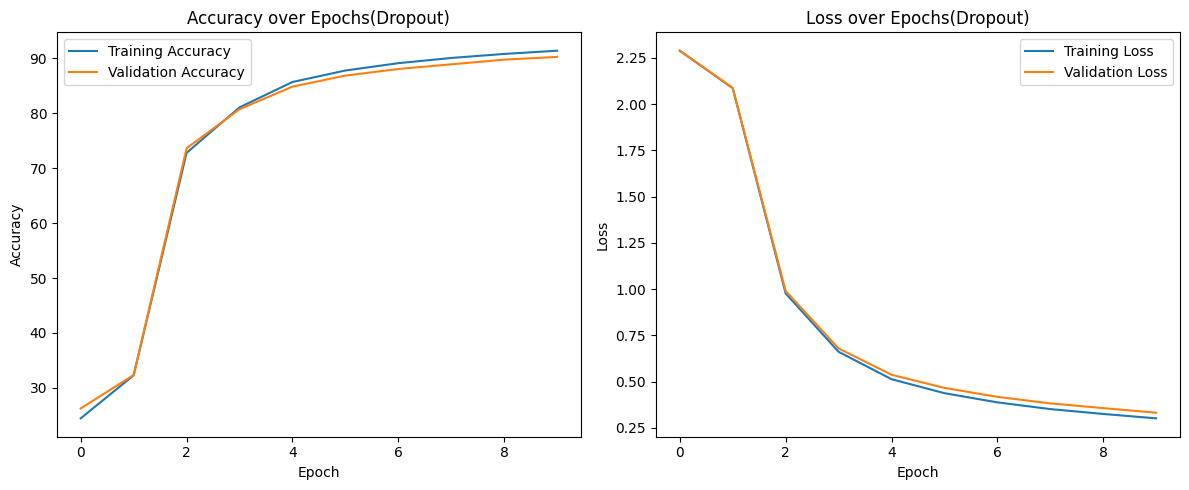

Training with early stopping criterion:
Epoch 1, Training Loss: 0.35947393790421417, Training Accuracy: 89.09876543209877, Validation Loss: 0.39476687310133995, Validation Accuracy: 87.55555555555556
Epoch 2, Training Loss: 0.2041562808524129, Training Accuracy: 94.05555555555556, Validation Loss: 0.23922759415438577, Validation Accuracy: 93.01851851851852
Epoch 3, Training Loss: 0.1503391572120448, Training Accuracy: 95.49588477366255, Validation Loss: 0.19079276282624405, Validation Accuracy: 94.35185185185185
Epoch 4, Training Loss: 0.12514682449204978, Training Accuracy: 96.20781893004116, Validation Loss: 0.17246106339281347, Validation Accuracy: 94.7037037037037
Epoch 5, Training Loss: 0.07115953234905298, Training Accuracy: 98.05761316872427, Validation Loss: 0.1204602615131828, Validation Accuracy: 96.44444444444444
Epoch 6, Training Loss: 0.05562147216317219, Training Accuracy: 98.43415637860082, Validation Loss: 0.10817627741482966, Validation Accuracy: 96.61111111111111
Epoc

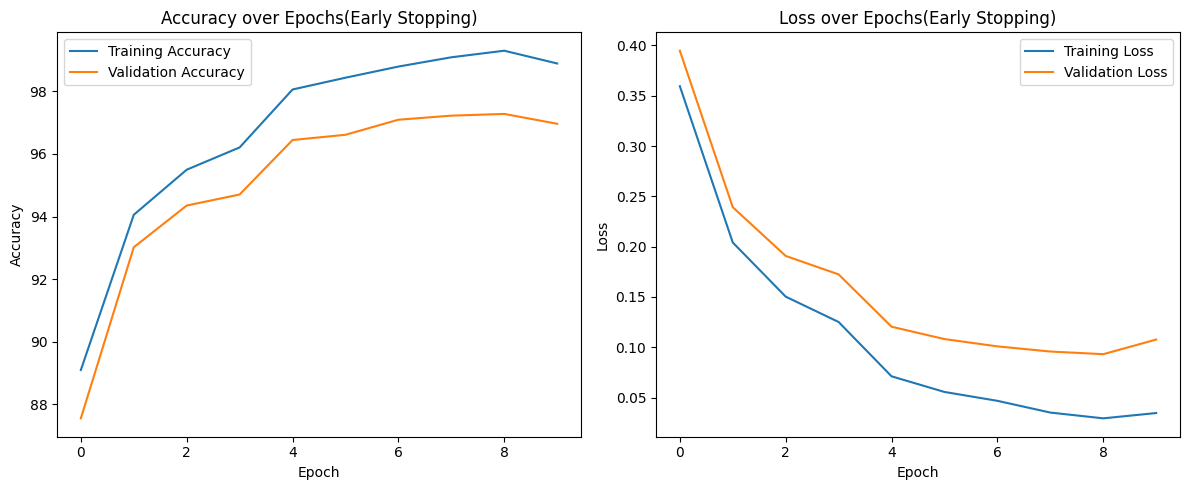

Test Loss with weight regularization: 0.3153576877097924, Test Accuracy with weight regularization: 90.82000000000001
Test Loss with dropout strategy: 0.29049237292506186, Test Accuracy with dropout strategy: 91.44
Test Loss with early stopping criterion: 0.06804707822982335, Test Accuracy with early stopping criterion: 97.91


In [ ]:
##################################################
#Training with weight regularization
##################################################


def L2Regularization(weights, lamda):
    regularizer = 0
    for w in weights:
        regularizer += 0.5 * lamda * np.sum(w ** 2)
    return regularizer

def WeightRegularizationTraining(inputs, targets_idx, activationFunction, activationGradient, lamda, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001):
    hiddenUnits = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples/batch_size))
    split_size = int(n_samples * train_val_split)
    trainData = inputs[:split_size]
    trainLabel = targets_idx[:split_size]
    valData = inputs[split_size:]
    valLabel = targets_idx[split_size:]

    inputDimension = trainData.shape[1]
    W1 = np.random.randn(inputDimension, hiddenUnits) * 0.01
    W2 = np.random.randn(hiddenUnits, hiddenUnits) * 0.01
    W3 = np.random.randn(hiddenUnits, n_classes) * 0.01
    weights = [W1, W2, W3]

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        idx = np.random.permutation(split_size)
        trainData = trainData[idx]
        trainLabel = trainLabel[idx]
        for i in range(0, trainData.shape[0], batch_size):
            batchData = trainData[i:i+batch_size]
            batchLabel = trainLabel[i:i+batch_size]

            activations = forwardPropagation(batchData, weights, activationFunction)

            gradients = backwardPropagation(batchData, batchLabel, weights, activations, activationGradient)

            for j in range(len(weights)):
                gradients[j] += lamda * weights[j]

            weights = applyGradients(weights, gradients, learning_rate)

        activations = forwardPropagation(trainData, weights, activationFunction)
        trainLoss = crossEntropyLoss(activations[0], trainLabel) + L2Regularization(weights, lamda)
        trainAccuracy = accuracy(activations[0], trainLabel)

        activations = forwardPropagation(valData, weights, activationFunction)
        valLoss = crossEntropyLoss(activations[0], valLabel) + L2Regularization(weights, lamda)
        valAccuracy = accuracy(activations[0], valLabel)

        train_losses.append(trainLoss)
        train_accuracies.append(trainAccuracy)
        val_losses.append(valLoss)
        val_accuracies.append(valAccuracy)

        print(f'Epoch {epoch + 1}, Training Loss: {trainLoss}, Training Accuracy: {trainAccuracy}, Validation Loss: {valLoss}, Validation Accuracy: {valAccuracy}')

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy over Epochs(Weight Regularization)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss over Epochs(Weight Regularization)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return weights

##################################################
#Training with dropout strategy
##################################################

def dropout(X, dropoutProbability):
    mask = np.random.rand(*X.shape) < dropoutProbability
    return X * mask / dropoutProbability, mask

def DropoutTraining(inputs, targets_idx, activationFunction, activationGradient, dropoutProbability, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001 ):
    hiddenUnits = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples/batch_size))
    split_size = int(n_samples * train_val_split)
    trainData = inputs[:split_size]
    trainLabel = targets_idx[:split_size]
    valData = inputs[split_size:]
    valLabel = targets_idx[split_size:]

    inputDimension = trainData.shape[1]
    W1 = np.random.randn(inputDimension, hiddenUnits) * 0.01
    W2 = np.random.randn(hiddenUnits, hiddenUnits) * 0.01
    W3 = np.random.randn(hiddenUnits, n_classes) * 0.01
    weights = [W1, W2, W3]

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        idx = np.random.permutation(split_size)
        trainData = trainData[idx]
        trainLabel = trainLabel[idx]
        for i in range(0, trainData.shape[0], batch_size):
            batchData = trainData[i:i+batch_size]
            batchLabel = trainLabel[i:i+batch_size]

            Z1 = batchData.dot(weights[0])
            A1 = activationFunction(Z1)
            A1_dropout, mask = dropout(A1, dropoutProbability)
            Z2 = A1_dropout.dot(weights[1])
            A2 = activationFunction(Z2)
            Z3 = A2.dot(weights[2])
            Y = softmax(Z3)

            activations = (Z1, A1, mask, Z2, A2, Z3, Y)

            dZ3 = Y.copy()
            dZ3[range(batchData.shape[0]), batchLabel] -= 1
            dZ3 /= batchData.shape[0]
            dW3 = A2.T.dot(dZ3)

            dA2 = dZ3.dot(weights[2].T)
            dZ2 = dA2 * activationGradient(Z2)
            dW2 = A1_dropout.T.dot(dZ2)

            dA1_dropout = dZ2.dot(weights[1].T)
            dA1_dropout *= mask
            dA1 = dA1_dropout / dropoutProbability
            dZ1 = dA1 * activationGradient(Z1)
            dW1 = batchData.T.dot(dZ1)

            gradients = [dW1, dW2, dW3]

            weights = applyGradients(weights, gradients, learning_rate)

        activations = forwardPropagation(trainData, weights, activationFunction)
        trainLoss = crossEntropyLoss(activations[0], trainLabel)
        trainAccuracy = accuracy(activations[0], trainLabel)

        activations = forwardPropagation(valData, weights, activationFunction)
        valLoss = crossEntropyLoss(activations[0], valLabel)
        valAccuracy = accuracy(activations[0], valLabel)

        train_losses.append(trainLoss)
        train_accuracies.append(trainAccuracy)
        val_losses.append(valLoss)
        val_accuracies.append(valAccuracy)


        print(f'Epoch {epoch + 1}, Training Loss: {trainLoss}, Training Accuracy: {trainAccuracy}, Validation Loss: {valLoss}, Validation Accuracy: {valAccuracy}')

        # Plotting the results after the loop
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy over Epochs(Dropout)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss over Epochs(Dropout)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return weights

##################################################
#Training with early stopping criterion
##################################################
def EarlyStoppingTraining(inputs, targets_idx, activationFunction, activationGradient,  batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001):
    hiddenUnits = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = int(np.ceil(n_samples/batch_size))
    split_size = int(n_samples * train_val_split)
    trainData = inputs[:split_size]
    trainLabel = targets_idx[:split_size]
    valData = inputs[split_size:]
    valLabel = targets_idx[split_size:]

    inputDimension = trainData.shape[1]
    W1 = np.random.randn(inputDimension, hiddenUnits) * 0.01
    W2 = np.random.randn(hiddenUnits, hiddenUnits) * 0.01
    W3 = np.random.randn(hiddenUnits, n_classes) * 0.01
    weights = [W1, W2, W3]

    bestValLoss = float('inf')
    bestWeights = None
    epochs_without_improvement = 0
    max_epochs_without_improvement = 5

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        idx = np.random.permutation(split_size)
        trainData = trainData[idx]
        trainLabel = trainLabel[idx]
        for i in range(0, trainData.shape[0], batch_size):
            batchData = trainData[i:i+batch_size]
            batchLabel = trainLabel[i:i+batch_size]

            activations = forwardPropagation(batchData, weights, activationFunction)

            gradients = backwardPropagation(batchData, batchLabel, weights, activations, activationGradient)

            weights = applyGradients(weights, gradients, learning_rate)

        activations = forwardPropagation(trainData, weights, activationFunction)
        trainLoss = crossEntropyLoss(activations[0], trainLabel)
        trainAccuracy = accuracy(activations[0], trainLabel)

        activations = forwardPropagation(valData, weights, activationFunction)
        valLoss = crossEntropyLoss(activations[0], valLabel)
        valAccuracy = accuracy(activations[0], valLabel)

        train_losses.append(trainLoss)
        train_accuracies.append(trainAccuracy)
        val_losses.append(valLoss)
        val_accuracies.append(valAccuracy)

        print(f'Epoch {epoch + 1}, Training Loss: {trainLoss}, Training Accuracy: {trainAccuracy}, Validation Loss: {valLoss}, Validation Accuracy: {valAccuracy}')



        if valLoss < bestValLoss:
            bestValLoss = valLoss
            bestWeights = weights
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= max_epochs_without_improvement:
                print("Early stopping triggered. No improvement in validation loss.")
                break

            # Plotting the results after the loop
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy over Epochs(Early Stopping)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss over Epochs(Early Stopping)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return bestWeights

activationFunction = relu
activationGradient = relu_gradient

lamda = 0.001
dropoutProbability = 0.2

print("Training with weight regularization:")
regularizedWeights = WeightRegularizationTraining(trainData, trainLabel,  epochs=10, batch_size=64, learning_rate=0.01, activationFunction=activationFunction, activationGradient=activationGradient, lamda=lamda)

print("Training with dropout strategy:")
dropoutWeights = DropoutTraining(trainData, trainLabel, epochs=10, batch_size=64,train_val_split=0.9, learning_rate=0.01, activationFunction=activationFunction, activationGradient=activationGradient, dropoutProbability=dropoutProbability)

print("Training with early stopping criterion:")
earlyStoppingWeights = EarlyStoppingTraining(trainData, trainLabel, epochs=10, batch_size=64, learning_rate=0.1, activationFunction=activationFunction, activationGradient=activationGradient)

activations = forwardPropagation(testData, regularizedWeights, activationFunction)
testLossRegularization = crossEntropyLoss(activations[0], testLabel)
testAccuracyRegularization = accuracy(activations[0], testLabel)
print(f'Test Loss with weight regularization: {testLossRegularization}, Test Accuracy with weight regularization: {testAccuracyRegularization}')

activations = forwardPropagation(testData, dropoutWeights, activationFunction)
testLossDropout = crossEntropyLoss(activations[0], testLabel)
testAccuracyDropout = accuracy(activations[0], testLabel)
print(f'Test Loss with dropout strategy: {testLossDropout}, Test Accuracy with dropout strategy: {testAccuracyDropout}')

activations = forwardPropagation(testData, earlyStoppingWeights, activationFunction)
testLossEarlyStopping = crossEntropyLoss(activations[0], testLabel)
testAccuracyEarlyStopping = accuracy(activations[0], testLabel)
print(f'Test Loss with early stopping criterion: {testLossEarlyStopping}, Test Accuracy with early stopping criterion: {testAccuracyEarlyStopping}')




<b> Report your observations </b>

1. Regularization techniques like weight regularization , dropout and early stopping improves the model's performance.

2. Weight Regularization: Weight regularization, such as L1 and L2 regularization, adds a penalty term to the loss function based on the magnitude of the weights. This penalty discourages overly complex models by penalizing large weight values.

3. Dropout: Dropout is a regularization technique where random units (neurons) are temporarily dropped out or ignored during training, meaning their outputs are set to zero. By randomly dropping out units, dropout prevents co-adaptation among neurons and encourages the network to learn more robust and diverse features.

4. Early Stopping: Early stopping involves monitoring the performance of the model on a validation set during training and stopping the training process when the performance starts to degrade. This prevents the model from overfitting to the training data by terminating the training process before the model's performance on the validation set begins to decline.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



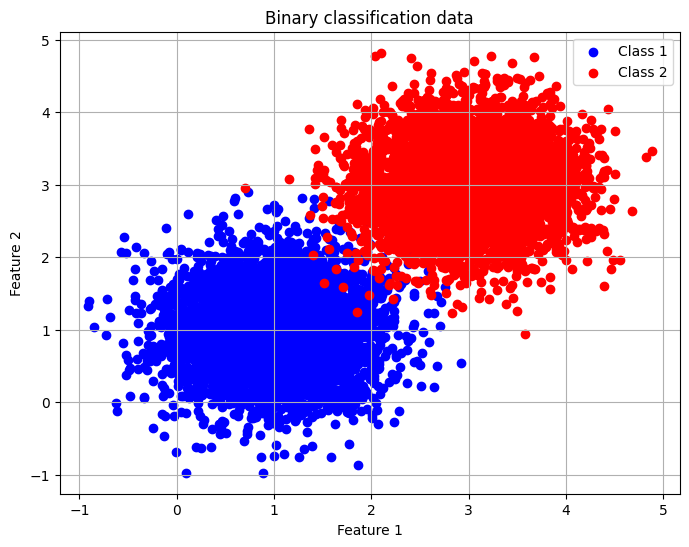

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


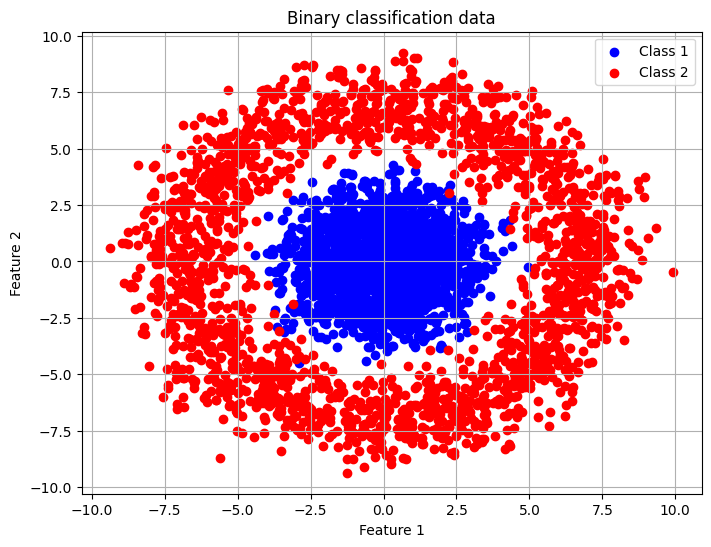

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)
tr_data_2 = np.concatenate([class1_data, class2_data], axis=0)
tr_targets_2 = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))])
class1_test, class2_test = generate_concentric_data(200, radius1,radius2,noise_std)
te_data_2 = np.concatenate([class1_test, class2_test], axis=0)
te_targets_2 = np.concatenate([np.zeros(len(class1_test)), np.ones(len(class2_test))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



Logistic Regression Accuracy: 0.996
Epoch 1 Training Accuracy =  0.9786419753086419
Epoch 1 Validation Accuracy =  0.9422222222222222  

Epoch 6 Training Accuracy =  0.9940740740740741
Epoch 6 Validation Accuracy =  0.9966666666666667  

Epoch 11 Training Accuracy =  0.9937037037037038
Epoch 11 Validation Accuracy =  0.9933333333333333  

Epoch 16 Training Accuracy =  0.9941975308641975
Epoch 16 Validation Accuracy =  0.9944444444444445  

Epoch 21 Training Accuracy =  0.9938271604938271
Epoch 21 Validation Accuracy =  0.9944444444444445  

Epoch 26 Training Accuracy =  0.9940740740740741
Epoch 26 Validation Accuracy =  0.9944444444444445  



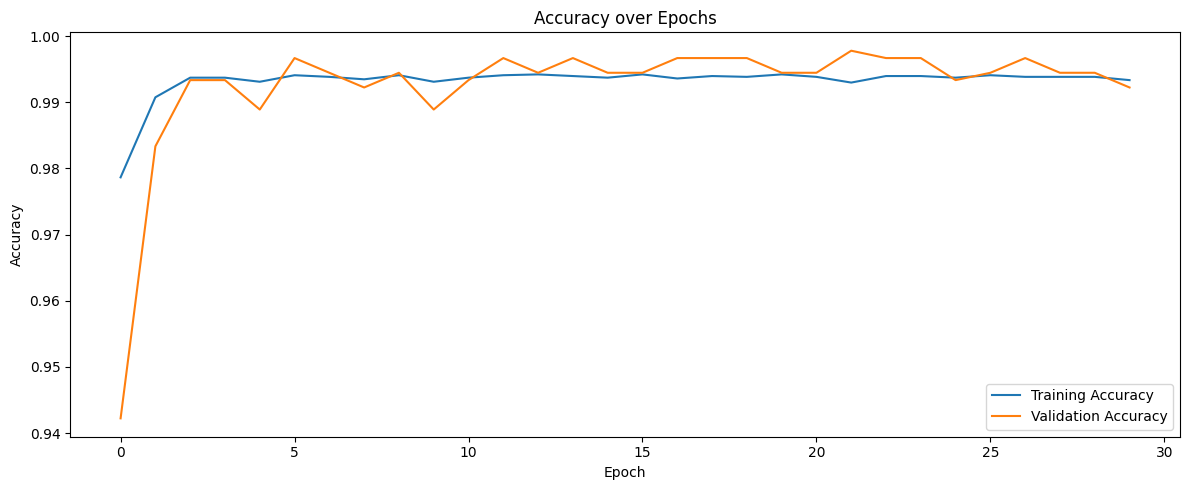

Testing Accuracy using Deep Neural Networks =  0.997


In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################

def Logistic_Regression(trainData, trainLabel, X_test):
    max_iter = 1000
    threshold = 0.5
    X = np.hstack((np.ones((trainData.shape[0], 1)), trainData))
    w = np.random.randn(X.shape[1]) * 0.01

    for _ in range(max_iter):
        preds = 1 / (1 + np.exp(-X.dot(w)))
        error = preds - trainLabel
        gradient = X.T.dot(error)
        H = (preds * (1 - preds) * X.T).dot(X)
        w -= np.linalg.pinv(H).dot(gradient)

    # Predictions on test data
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    test_preds = 1 / (1 + np.exp(-X_test.dot(w))) > threshold
    return test_preds.astype(int)

def evaluate_accuracy(predictions, targets):
    return (predictions == targets).mean()




##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################



#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights, biases):
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    X = inputs

    Z1 = X.dot(W1) + b1
    A1 = relu(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = relu(Z2)
    Z3 = A2.dot(W3) +b3
    Y_hat = sigmoid(Z3)

    activations = [X, Z1, Z2, Y_hat]
    return activations

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations, biases):
    a0, a1, a2, y_hat = activations
    W1, W2, W3 = weights
    b1, b2, b3 = biases

    dZ3 = y_hat - targets
    dZ2 = dZ3 @ W3.T
    dZ2 *= relu_gradient(a2)

    dZ1 = dZ2 @ W2.T
    dZ1 *= relu_gradient(a1)

    z1 = relu(a1)
    z2 = relu(a2)

    db3 = np.sum(dZ3) / a0.shape[0]
    db2 = np.sum(dZ2) / a0.shape[0]
    db1 = np.sum(dZ1) / a0.shape[0]

    dW1 = a0.T@dZ1 / a0.shape[0]
    dW2 = z1.T@dZ2 / a0.shape[0]
    dW3 = z2.T@dZ3 / a0.shape[0]

    return [dW1, dW2, dW3, db1, db2, db3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate, biases):

    W1, W2, W3 = weights
    dW1, dW2, dW3, db1, db2, db3 = gradients
    b1, b2, b3 = biases

    # Update the parameters
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    W3 -= learning_rate * dW3

    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    b3 = b3 - learning_rate * db3

    # Return the updated parameters
    return [W1, W2, W3],[b1,b2,b3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate, biases):
    # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

    # Compute the gradients
    gradients = computeGradients(inputs, targets, weights, activations, biases)

    # Update the parameters using gradients
    weights,biases = applyGradients(weights, gradients, learning_rate, biases)

    # Return the updated parameters
    return weights, biases

def getPredictions(y_hat):
    return np.where(y_hat > 0.5, 1, 0)

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size=1, epochs=30, train_val_split=0.9, learning_rate=0.001):
    hidden_units = 2
    n_classes = 1

    # Split the training data into two parts.
    # Use 90 percent of training data for training the network.
    # Remaining 10 percent as validation data
    size = int(inputs.shape[0] * train_val_split)

    trainData = inputs[:size, :]
    trainLabel = targets_idx[:size]
    valData = inputs[size:, :]
    valLabel = targets_idx[size:]

    n_samples = trainData.shape[0]
    n_batches = int(n_samples / batch_size)

    # Randomly initialize the weights
    W1 = np.random.rand(2, 3) - 0.5
    W2 = np.random.rand(3, 3) - 0.5
    W3 = np.random.rand(3, n_classes) - 0.5

    # Iterate for epochs times
    biases = np.random.rand(3)
    weights = [W1, W2, W3]
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []
    for epoch in range(epochs):
        # Shuffle the training data
        idx = np.random.permutation(trainData.shape[0])
        trainData = trainData[idx, :]
        trainLabel = trainLabel[idx]

        # Iterate through the batches of data
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            batchData = trainData[start_idx:end_idx]
            batchLabel = trainLabel[start_idx:end_idx]

            activations = fwdPropagate(batchData, weights, biases)

            # Backward propagation
            weights, biases = backPropagate(batchData, batchLabel, weights, activations, learning_rate, biases)

        # Compute outputs on training data
        activations = fwdPropagate(trainData, weights, biases)
        y_hat = activations[3]
        trainingAcc = np.sum(getPredictions(y_hat) == np.array(trainLabel.reshape(trainLabel.shape[0], 1), dtype=np.intc)) / trainLabel.shape[0]

        # Compute outputs on validation data
        activations = fwdPropagate(valData, weights, biases)
        y_hat = activations[3]

        # Compute validation accuracy
        validationAcc = np.sum(getPredictions(y_hat) == valLabel.reshape(valLabel.shape[0], 1)) / valLabel.shape[0]
        train_accuracies.append(trainingAcc)
        val_accuracies.append(validationAcc)
        if epoch%5==0:
          print('Epoch', epoch + 1, 'Training Accuracy = ', trainingAcc)
          print('Epoch', epoch + 1, 'Validation Accuracy = ', validationAcc , " \n")

    # Plotting the results after the loop
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 1, 1)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Save the parameters of the network
    return weights, biases


##################################################
#Evaluate the performance on test data
##################################################


logisticPredictions = Logistic_Regression(tr_data, tr_targets, te_data)
logisticAccuracy = evaluate_accuracy(logisticPredictions, te_targets)
print(f"Logistic Regression Accuracy: {logisticAccuracy}")


trainingTargets = np.array(tr_targets, dtype = np.intc)
weights, biases = training(tr_data, trainingTargets)

activations = fwdPropagate(te_data, weights, biases)
y_hat = activations[3]
print('Testing Accuracy using Deep Neural Networks = ',np.sum(getPredictions(y_hat) == np.array(te_targets.reshape(te_targets.shape[0], 1), dtype = np.intc)) / te_targets.shape[0] )










Logistic Regression Accuracy: 0.5125
Epoch 1 Training Accuracy =  0.7663888888888889
Epoch 1 Validation Accuracy =  0.45  

Epoch 6 Training Accuracy =  0.8461111111111111
Epoch 6 Validation Accuracy =  0.6725  

Epoch 11 Training Accuracy =  0.8919444444444444
Epoch 11 Validation Accuracy =  0.8575  

Epoch 16 Training Accuracy =  0.9127777777777778
Epoch 16 Validation Accuracy =  0.8325  

Epoch 21 Training Accuracy =  0.9802777777777778
Epoch 21 Validation Accuracy =  0.9825  

Epoch 26 Training Accuracy =  0.9866666666666667
Epoch 26 Validation Accuracy =  0.985  

Epoch 31 Training Accuracy =  0.9847222222222223
Epoch 31 Validation Accuracy =  0.985  

Epoch 36 Training Accuracy =  0.9825
Epoch 36 Validation Accuracy =  0.98  

Epoch 41 Training Accuracy =  0.9802777777777778
Epoch 41 Validation Accuracy =  0.99  

Epoch 46 Training Accuracy =  0.9822222222222222
Epoch 46 Validation Accuracy =  0.9825  

Epoch 51 Training Accuracy =  0.9844444444444445
Epoch 51 Validation Accuracy

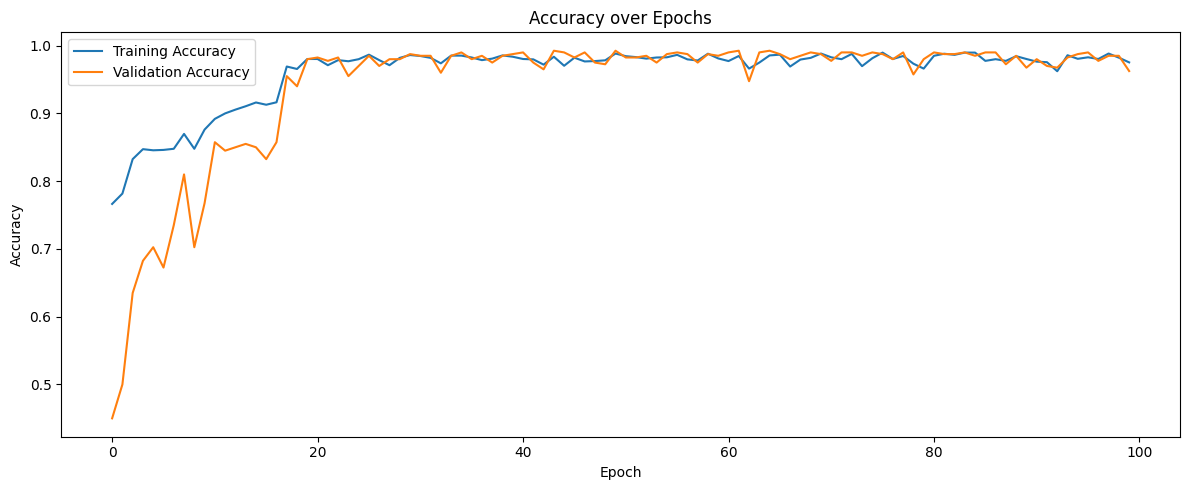

Testing Accuracy using Deep Neural Networks =  0.9675


In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
logisticPreds = Logistic_Regression(tr_data_2, tr_targets_2, te_data_2)
logisticAcc = evaluate_accuracy(logisticPreds, te_targets_2)
print(f"Logistic Regression Accuracy: {logisticAcc}")

##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################


tr_targets_2 = np.array(tr_targets_2, dtype = np.intc)
weights, biases = training(tr_data_2, tr_targets_2,epochs = 100)

activations = fwdPropagate(te_data_2, weights, biases)
y_out = activations[3]
print('Testing Accuracy using Deep Neural Networks = ',np.sum(getPredictions(y_out) == np.array(te_targets_2.reshape(te_targets_2.shape[0], 1), dtype = np.intc)) / te_targets_2.shape[0] )








<b> Report your observations </b>
1. Similar accuracy levels are achieved by both logistic regression and the Deep Neural Network (DNN) in the case of linearly separable data.

2. DNN Outperforms Logistic Regression in Non-linear Data: The Deep Neural Network (DNN) demonstrates superior performance compared to logistic regression when faced with non-linearly separable data. Logistic regression, with an accuracy of approximately 50%, produces a linear decision boundary incapable of effectively segregating the data. In contrast, the DNN transforms the input data into a higher-dimensional space, enabling linear separation and achieving a significantly higher accuracy of around 99%.

3. Consistent DNN Excellence: Across various data types, the DNN consistently exhibits superior performance compared to other models. Its adeptness at discerning underlying data structures leads to higher classification accuracy by capturing intricate patterns and correlations.

4. Adaptability to Complex Data: DNNs excel in learning complex non-linear relationships within data, in contrast to the linear decision boundaries of logistic regression. This adaptability enables them to handle the intricate patterns and variations present in real-world datasets, thereby enhancing accuracy and performance.

5. Feature Representation Learning: DNNs leverage multiple levels of abstraction to automatically extract significant representations of input features. Their hierarchical feature learning capability allows them to discern both low-level and high-level features, leading to better differentiation between classes.

